# Evaluation for Translation Models

## DataSet

1. Hindi to English Translation Benchmark Dataset
2. Tamil to English Translation Benchmark Dataset
3. English to Kannada Translation Benchmark Dataset
4. Malayalam to English Translation Benchmark Dataset

Source organisation:  Digital India BHASHINI Division

Site: https://aikosh.indiaai.gov.in/web/datasets/ 

License : CC BY-SA 4.0

About Datasets: 
The datasets provides news test references for Machine Translation (MT) evaluation, focusing on translations from Indian languages to English. 
As part of a comprehensive collection supporting translations into 128 target languages, this dataset includes document-level information, making it a valuable resource for multilingual MT benchmarking. Designed for the news domain, it facilitates the evaluation of translation quality and supports the development of robust translation systems. Submitted by Microsoft, this dataset is essential for researchers and developers working on translation tasks.

#### Load Data

In [44]:
import json
import os

# Define the paths to the JSON files
dataset_dir = "Datasets"
json_files = [
    "scert_chemistry_englist_to_malayalam.json"
]

# Read and store the data from each JSON file
datasets = {}
for filename in json_files:
    path = os.path.join(dataset_dir, filename)
    with open(path, 'r', encoding='utf-8') as f:
        datasets[filename] = json.load(f)

# Example: print the number of samples in each dataset

for name, data in datasets.items():
    print(f"\n{name} (showing 10 entries):")
    for entry in data[:10]:
        print(entry)
    print(f"{name}: {len(data)} samples")


scert_chemistry_englist_to_malayalam.json (showing 10 entries):
{'sourceText': 'Aluminium is manufactured by the reduction of alumina using electricity as reducing agent since the reactivity of aluminum is very high.', 'targetText': 'അലുമിനിയത്തിനു ക്രിയാശീലം വളരെ കൂടുതലായതിനാൽ അലുമിനിയെ  വൈദ്യുതി ഉപയോഗിച് നിരോസ്ക്സികരിച്ചാണ് അലൂമിനിയം നിർമിക്കുന്നത്'}
{'sourceText': 'The process of obtaining a coating of one metal over another metal using electrolysis is known as electro plating.', 'targetText': 'വൈദ്യുത വിശ്ലേഷണം വഴി ഒരു ലോഹത്തിന് മേൽ മറ്റൊരു ലോഹം ആവരണം ചെയ്\u200cതെടുക്കുന്ന രീതിയാണ് എലെക്ട്രോപ്ലേറ്റിംഗ്'}
{'sourceText': 'Sodium chloride in solid state is not an electrical conductor because its ions have no freedom of movement', 'targetText': 'ഖരാവസ്ഥയിലുള്ള സോഡിയം ക്ലോറൈഡ് വൈദ്യുതി വാഹിയല്ല , കാരണം ഇതിൽ ഈയോൺസിന് ചലന സ്വാതത്ര്യം ഇല്ല'}
{'sourceText': 'Galvanic cell is an arrangement in which the difference in reactivity of metals is used to produce electricity', 'targetText': 'ക്രിയ

In [45]:
# Create lists to store sentences
malayalam_sentences = []
english_sentences = []

# Track already added English sentences
english_seen = set()

for file in json_files:
    data = datasets[file]
    src_lang = "English"
    tgt_lang = "Malayalam" 
    for entry in data:
        english_sentences.append(entry['sourceText'])
        english_seen.add(entry['sourceText'])
        malayalam_sentences.append(entry['targetText'])

print(f"Total English sentences: {len(english_sentences)}")
print(f"Total Malayalam sentences: {len(malayalam_sentences)}")


Total English sentences: 10
Total Malayalam sentences: 10


### Evaluate with Llama Model

In [46]:
### Load Model 
import groq
from langchain_groq import ChatGroq

groq_api_key = os.getenv("GROQ_API_KEY")
if not groq_api_key:
    raise ValueError("Please set the GROQ_API_KEY environment variable.")

# Setup re-ranking
llm = ChatGroq(
    groq_api_key=groq_api_key,
    model="llama3-8b-8192"
)

In [47]:
# Define a function to translate English text to a given target language using the Groq Llama model
# Add instruction to the prompt for concise output
def llama_translate(text, target_lang):
    prompt = (
        f"Translate the following English sentence to {target_lang}.\n"
        f"Just give answer in target language without any extra explanations.\n"
        f"English: {text}\n"
        f"{target_lang.capitalize()}:"
    )
    try:
        response = llm.invoke(prompt)
        return response.content.strip()
    except Exception as e:
        print(f"Error translating to {target_lang}: {e}")
        return None

# Prepare lists to store translations
llama_malayalam = []

# Use only the first 100 samples for translation
for text in english_sentences[:100]:
    llama_malayalam.append(llama_translate(text, "malayalam"))

# Print the first 10 translations for each language
print("\nLlama Translations (showing 3 entries):")
for i in range(3):
    print(f"English: {english_sentences[i]}")
    print(f"Malayalam: {llama_malayalam[i]}")


Llama Translations (showing 3 entries):
English: Aluminium is manufactured by the reduction of alumina using electricity as reducing agent since the reactivity of aluminum is very high.
Malayalam: അലുമിനിയം അലുമിനയും വൈദ്യുതിയും ഉപയോഗിച്ച് ഉത്പാദിപ്പിക്കുന്നു, കാരണം അലുമിനിയത്തിന്റെ രാസ സമ്പത്ത് വളരെ ഉയർന്നതാണ്.
English: The process of obtaining a coating of one metal over another metal using electrolysis is known as electro plating.
Malayalam: ഒരു മീറ്റലിനെ മറ്റൊരു മീറ്റലിനെ കീരിയോളിറ്റ്രോസിസ് മൂലം ലഭിക്കുന്ന പ്രക്രിയയെ "ഇലക്ട്രോ പ്ലേറ്റിംഗ്" എന്നാണ് അറിയപ്പെടുന്നത്.
English: Sodium chloride in solid state is not an electrical conductor because its ions have no freedom of movement
Malayalam: സോഡിയം ക്ലോറൈഡ് സാന്ദ്രസ്ഥിതിയിലുള്ളത് വൈദ്യുത സാന്ദ്രസ്ഥിതിയില്ലാത്തത് കാരണം അതിന്റെ ഐയൺമാർ സ്ഥിരസ്ഥാനത്തിലുള്ളതിനാൽ സ്ഥിരസ്ഥാനത്തിലുള്ളതിനാൽ സ്ഥിരസ്


In [48]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

llama_languages = [
    ("Malayalam", malayalam_sentences, llama_malayalam),
]

### Llama BLEU

In [49]:


llama_bleu_scores = {}

smoothie = SmoothingFunction().method4

for lang_name, ref_list, cand_list in llama_languages:
    references = [[ref_list[i].split()] for i in range(len(cand_list))]
    candidates = [cand_list[i].split() for i in range(len(cand_list))]
    bleu_scores = [sentence_bleu(references[i], candidates[i], smoothing_function=smoothie) for i in range(len(candidates))]
    avg_score = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0
    llama_bleu_scores[lang_name] = avg_score
    # print(f"\n{lang_name} BLEU scores:")
    # for idx, score in enumerate(bleu_scores):
    #     print(f"Reference {idx+1}: {' '.join(references[idx][0])}")
    #     print(f"Candidate {idx+1}: {' '.join(candidates[idx])}")
    #     # print(f"BLEU score: {score:.4f}\n")
    print(f"Average BLEU score for {lang_name}: {avg_score:.4f}")

# Save overall average BLEU score for llama translations
llama_average_bleu = sum(llama_bleu_scores.values()) / len(llama_bleu_scores)
print(f"\nLlama's overall average BLEU score across all languages: {llama_average_bleu:.4f}")



Average BLEU score for Malayalam: 0.0192

Llama's overall average BLEU score across all languages: 0.0192


### Llama METEOR

In [50]:
from nltk.translate.meteor_score import meteor_score

def tokenize(text):
    return nltk.word_tokenize(text)

llama_meteor_scores = {}

for lang_name, ref_list, cand_list in llama_languages:
    references = [[ref_list[i].split()] for i in range(len(cand_list))]
    candidates = [cand_list[i].split() for i in range(len(cand_list))]
    meteor_scores = [meteor_score(references[i], candidates[i]) for i in range(len(candidates))]
    avg_score = sum(meteor_scores) / len(meteor_scores) if meteor_scores else 0
    llama_meteor_scores[lang_name] = avg_score
    # print(f"\n{lang_name} Meteor scores:")
    # for idx, score in enumerate(meteor_scores):
    #     print(f"Reference {idx+1}: {' '.join(references[idx][0])}")
    #     print(f"Candidate {idx+1}: {' '.join(candidates[idx])}")
    #     print(f"meteor_scores score: {score:.4f}\n")
    print(f"Average meteor_scores score for {lang_name}: {avg_score:.4f}")

# Save overall average BLEU score for llama translations
llama_average_meteor = sum(llama_meteor_scores.values()) / len(llama_meteor_scores)
print(f"\nLlama's overall average METEOR score across all languages: {llama_average_meteor:.4f}")  

Average meteor_scores score for Malayalam: 0.0630

Llama's overall average METEOR score across all languages: 0.0630


### Llama ROGUE

In [51]:
from rouge_score import rouge_scorer

# Evaluate ROUGE scores for all languages and print each separately for GPT-4o
llama_rouge_scores = {}

for lang_name, ref_list, cand_list in llama_languages:
    # Use only the first N samples for fair comparison (N = len(cand_list))
    references = ref_list[:len(cand_list)]
    candidates = cand_list
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []
    for ref, cand in zip(references, candidates):
        scores = scorer.score(ref, cand)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)
    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)
    llama_rouge_scores[lang_name] = {
        'ROUGE-1': avg_rouge1,
        'ROUGE-2': avg_rouge2,
        'ROUGE-L': avg_rougeL
    }
    print(f"\n{lang_name} ROUGE Scores (GPT-4o):")
    print(f"  ROUGE-1 F1: {avg_rouge1:.4f}")
    print(f"  ROUGE-2 F1: {avg_rouge2:.4f}")
    print(f"  ROUGE-L F1: {avg_rougeL:.4f}")

# Optionally, print overall averages
avg_rouge1_all = sum([v['ROUGE-1'] for v in llama_rouge_scores.values()]) / len(llama_rouge_scores)
avg_rouge2_all = sum([v['ROUGE-2'] for v in llama_rouge_scores.values()]) / len(llama_rouge_scores)
avg_rougeL_all = sum([v['ROUGE-L'] for v in llama_rouge_scores.values()]) / len(llama_rouge_scores)
print(f"\nGPT-4o's overall average ROUGE-1 F1: {avg_rouge1_all:.4f}")
print(f"GPT-4o's overall average ROUGE-2 F1: {avg_rouge2_all:.4f}")
print(f"GPT-4o's overall average ROUGE-L F1: {avg_rougeL_all:.4f}")


Malayalam ROUGE Scores (GPT-4o):
  ROUGE-1 F1: 0.0000
  ROUGE-2 F1: 0.0000
  ROUGE-L F1: 0.0000

GPT-4o's overall average ROUGE-1 F1: 0.0000
GPT-4o's overall average ROUGE-2 F1: 0.0000
GPT-4o's overall average ROUGE-L F1: 0.0000


## OpenAI Evaluation

In [52]:
import os
from openai import OpenAI  # the new client entrypoint

# Initialize the client once
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
if not client.api_key:
    raise ValueError("Please set the OPENAI_API_KEY environment variable.")

def gpt4o_translate(text: str, target_lang: str) -> str | None:
    prompt = (
        f"Translate the following English sentence to {target_lang}.\n"
        "Just give the answer in the target language without any extra explanations.\n"
        f"English: {text}\n"
        f"{target_lang.capitalize()}:"
    )

    try:
        # call the chat completion endpoint
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=256,
            temperature=0.2,
        )
        # pull out the actual translated text
        return response.choices[0].message.content.strip()

    except Exception as e:
        print(f"Error translating to {target_lang}: {e}")
        return None


In [53]:
# Translate first 100 English sentences to all target languages using GPT-4o-mini
gpt4o_malayalam = []

for text in english_sentences[:100]:
    gpt4o_malayalam.append(gpt4o_translate(text, "malayalam"))

# Print the first 3 translations for each language
print("\nGPT-4o-mini Translations (showing 3 entries):")
for i in range(3):
    print(f"English: {english_sentences[i]}")
    print(f"Malayalam: {gpt4o_malayalam[i]}")



GPT-4o-mini Translations (showing 3 entries):
English: Aluminium is manufactured by the reduction of alumina using electricity as reducing agent since the reactivity of aluminum is very high.
Malayalam: അലുമിനിയം ഉൽപ്പാദിപ്പിക്കുന്നത് അലുമിനയുടെ കുറവുപയോഗിച്ച് വൈദ്യുതി കുറവായ ഏജന്റായി ഉപയോഗിച്ച് ആണ്, കാരണം അലുമിനിയത്തിന്റെ പ്രതികരണശേഷി വളരെ ഉയർന്നതാണ്.
English: The process of obtaining a coating of one metal over another metal using electrolysis is known as electro plating.
Malayalam: ഇലക്ട്രോലൈസിസ് ഉപയോഗിച്ച് ഒരു ലോഹത്തിന്റെ മേൽ മറ്റൊരു ലോഹത്തിന്റെ കോറ്റിംഗ് നേടുന്ന പ്രക്രിയയെ ഇലക്ട്രോ പ്ലേറ്റിംഗ് എന്ന് അറിയുന്നു.
English: Sodium chloride in solid state is not an electrical conductor because its ions have no freedom of movement
Malayalam: സോഡിയം ക്ലോറൈഡ് ഉറച്ച അവസ്ഥയിൽ വൈദ്യുത ചാലകമല്ല, കാരണം അതിന്റെ അയോണുകൾ ചലനത്തിന്റെ സ്വാതന്ത്ര്യം ഇല്ല.


In [54]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

gpt4o_languages = [
    ("Malayalam", malayalam_sentences, gpt4o_malayalam)
]

gpt4o_bleu_scores = {}
smoothie = SmoothingFunction().method4

for lang_name, ref_list, cand_list in gpt4o_languages:
    references = [[ref_list[i].split()] for i in range(len(cand_list))]
    candidates = [cand_list[i].split() for i in range(len(cand_list))]
    bleu_scores = [sentence_bleu(references[i], candidates[i], smoothing_function=smoothie) for i in range(len(candidates))]
    avg_score = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0
    gpt4o_bleu_scores[lang_name] = avg_score
    print(f"Average BLEU score for {lang_name}: {avg_score:.4f}")

gpt4o_average_bleu = sum(gpt4o_bleu_scores.values()) / len(gpt4o_bleu_scores)
print(f"\nGPT-4o's overall average BLEU score across all languages: {gpt4o_average_bleu:.4f}")

Average BLEU score for Malayalam: 0.0391

GPT-4o's overall average BLEU score across all languages: 0.0391


In [55]:
from nltk.translate.meteor_score import meteor_score

def tokenize(text):
    return nltk.word_tokenize(text)

gpt4o_meteor_scores = {}

for lang_name, ref_list, cand_list in gpt4o_languages:
    meteor_scores = [meteor_score(references[i], candidates[i]) for i in range(len(candidates))]    
    avg_score = sum(meteor_scores) / len(meteor_scores) if meteor_scores else 0
    gpt4o_meteor_scores[lang_name] = avg_score
    print(f"\n{lang_name} METEOR scores:")
    print(f"Average METEOR score for {lang_name}: {avg_score:.4f}")

gpt4o_average_meteor = sum(gpt4o_meteor_scores.values()) / len(gpt4o_meteor_scores)
print(f"\ngpt4o's overall average METEOR score across all languages: {gpt4o_average_meteor:.4f}")




Malayalam METEOR scores:
Average METEOR score for Malayalam: 0.1597

gpt4o's overall average METEOR score across all languages: 0.1597


In [56]:
from rouge_score import rouge_scorer

# Evaluate ROUGE scores for all languages and print each separately for GPT-4o
gpt4o_rouge_scores = {}

for lang_name, ref_list, cand_list in gpt4o_languages:
    # Use only the first N samples for fair comparison (N = len(cand_list))
    references = ref_list[:len(cand_list)]
    candidates = cand_list
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []
    for ref, cand in zip(references, candidates):
        scores = scorer.score(ref, cand)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)
    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)
    gpt4o_rouge_scores[lang_name] = {
        'ROUGE-1': avg_rouge1,
        'ROUGE-2': avg_rouge2,
        'ROUGE-L': avg_rougeL
    }
    print(f"\n{lang_name} ROUGE Scores (GPT-4o):")
    print(f"  ROUGE-1 F1: {avg_rouge1:.4f}")
    print(f"  ROUGE-2 F1: {avg_rouge2:.4f}")
    print(f"  ROUGE-L F1: {avg_rougeL:.4f}")

# Optionally, print overall averages
avg_rouge1_all = sum([v['ROUGE-1'] for v in gpt4o_rouge_scores.values()]) / len(gpt4o_rouge_scores)
avg_rouge2_all = sum([v['ROUGE-2'] for v in gpt4o_rouge_scores.values()]) / len(gpt4o_rouge_scores)
avg_rougeL_all = sum([v['ROUGE-L'] for v in gpt4o_rouge_scores.values()]) / len(gpt4o_rouge_scores)
print(f"\nGPT-4o's overall average ROUGE-1 F1: {avg_rouge1_all:.4f}")
print(f"GPT-4o's overall average ROUGE-2 F1: {avg_rouge2_all:.4f}")
print(f"GPT-4o's overall average ROUGE-L F1: {avg_rougeL_all:.4f}")


Malayalam ROUGE Scores (GPT-4o):
  ROUGE-1 F1: 0.0000
  ROUGE-2 F1: 0.0000
  ROUGE-L F1: 0.0000

GPT-4o's overall average ROUGE-1 F1: 0.0000
GPT-4o's overall average ROUGE-2 F1: 0.0000
GPT-4o's overall average ROUGE-L F1: 0.0000


### Sarvam API Evaluation

In [57]:
# Import SarvamAI client class (make sure the SarvamAI SDK is installed and imported correctly)
from sarvamai import SarvamAI  # Adjust import based on actual SDK

# Your Sarvam API key
sarvam_api_key = os.getenv("SARVAM_API_KEY")  # Replace with your actual API key

# Initialize SarvamAI client globally
try:
    sarvam_client = SarvamAI(api_subscription_key=sarvam_api_key)
    print("✅ Sarvam AI client initialized")
except Exception as e:
    print(f"Error initializing Sarvam AI client: {e}")
    sarvam_client = None  # Set client to None if initialization fails

def sarvam_translate(text, target_lang_code="hi-IN"):
    """
    Translate input text from English (en-IN) to target language using Sarvam API.
    """
    if sarvam_client is None:
        raise RuntimeError("Sarvam AI client is not initialized.")
    
    try:
        response = sarvam_client.text.translate(
            input=text,
            source_language_code="en-IN",  # Assuming source is English (India)
            target_language_code=target_lang_code,
            speaker_gender="Male",         # Default as per examples
            mode="formal",                 # sarvam-translate:v1 supports formal mode only
            enable_preprocessing=False     # As per notebook examples
            # numerals_format="international"  # Optional parameter if needed
        )
        return response.translated_text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

✅ Sarvam AI client initialized


In [58]:
# Define Sarvam language codes for each target language
sarvam_lang_codes = {
    "Malayalam": "ml-IN",
}

# Prepare lists to store Sarvam translations
sarvam_malayalam = []

# Translate first 100 English sentences to all target languages using Sarvam
for text in english_sentences[:100]:
    sarvam_malayalam.append(sarvam_translate(text, sarvam_lang_codes["Malayalam"]))

# Print the first 3 translations for each language
print("\nSarvam Translations (showing 3 entries):")
for i in range(3):
    print(f"English: {english_sentences[i]}")
    print(f"Malayalam: {sarvam_malayalam[i]}")


Sarvam Translations (showing 3 entries):
English: Aluminium is manufactured by the reduction of alumina using electricity as reducing agent since the reactivity of aluminum is very high.
Malayalam: അലുമിനിയത്തിന്‍റെ പ്രതിപ്രവർത്തനക്ഷമത വളരെ കൂടുതലായതിനാൽ അലുമിനയെ കുറയ്ക്കുന്നതിനുള്ള ഏജന്‍റായി വൈദ്യുതി ഉപയോഗിച്ചുകൊണ്ട് അലുമിനിയം നിർമ്മിക്കുന്നു.
English: The process of obtaining a coating of one metal over another metal using electrolysis is known as electro plating.
Malayalam: വൈദ്യുതവിശ്ലേഷണം ഉപയോഗിച്ച് ഒരു ലോഹത്തിന്മേൽ മറ്റൊന്നിനുമേൽ ഒരു പൂശൽ ലഭിക്കുന്ന പ്രക്രിയയെ ഇലക്ട്രോപ്ലേറ്റിംഗ് എന്ന് വിളിക്കുന്നു.
English: Sodium chloride in solid state is not an electrical conductor because its ions have no freedom of movement
Malayalam: ഖരരൂപത്തിലുള്ള സോഡിയം ക്ലോറൈഡ് ഒരു വൈദ്യുതവാഹകമല്ല, കാരണം അതിന്‍റെ അയോണുകൾക്ക് ചലനസ്വാതന്ത്ര്യമില്ല.


In [59]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Prepare references and candidates for BLEU evaluation for Sarvam
sarvam_languages = [
    ("Malayalam", malayalam_sentences[:len(sarvam_malayalam)], sarvam_malayalam)
]

sarvam_bleu_scores = {}
smoothie = SmoothingFunction().method4

for lang_name, ref_list, cand_list in sarvam_languages:
    references = [[ref_list[i].split()] for i in range(len(cand_list))]
    candidates = [cand_list[i].split() for i in range(len(cand_list))]
    bleu_scores = [sentence_bleu(references[i], candidates[i], smoothing_function=smoothie) for i in range(len(candidates))]
    avg_score = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0
    sarvam_bleu_scores[lang_name] = avg_score
    print(f"Average BLEU score for {lang_name}: {avg_score:.4f}")

sarvam_average_bleu = sum(sarvam_bleu_scores.values()) / len(sarvam_bleu_scores)
print(f"\nSarvam's overall average BLEU score across all languages: {sarvam_average_bleu:.4f}")

Average BLEU score for Malayalam: 0.0442

Sarvam's overall average BLEU score across all languages: 0.0442


In [60]:
from nltk.translate.meteor_score import meteor_score

def tokenize(text):
    return nltk.word_tokenize(text)

sarvam_meteor_scores = {}

for lang_name, ref_list, cand_list in sarvam_languages:
    meteor_scores = [meteor_score(references[i], candidates[i]) for i in range(len(candidates))]    
    avg_score = sum(meteor_scores) / len(meteor_scores) if meteor_scores else 0
    sarvam_meteor_scores[lang_name] = avg_score
    print(f"\n{lang_name} METEOR scores:")
    print(f"Average METEOR score for {lang_name}: {avg_score:.4f}")

sarvam_average_meteor = sum(sarvam_meteor_scores.values()) / len(sarvam_meteor_scores)
print(f"\nLlama's overall average METEOR score across all languages: {sarvam_average_meteor:.4f}")




Malayalam METEOR scores:
Average METEOR score for Malayalam: 0.1827

Llama's overall average METEOR score across all languages: 0.1827


In [61]:
from rouge_score import rouge_scorer

# Evaluate ROUGE scores for all languages and print each separately for Sarvam
sarvam_rouge_scores = {}

for lang_name, ref_list, cand_list in sarvam_languages:
    # Use only the first N samples for fair comparison (N = len(cand_list))
    references = ref_list[:len(cand_list)]
    candidates = cand_list
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []
    for ref, cand in zip(references, candidates):
        scores = scorer.score(ref, cand)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)
    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)
    sarvam_rouge_scores[lang_name] = {
        'ROUGE-1': avg_rouge1,
        'ROUGE-2': avg_rouge2,
        'ROUGE-L': avg_rougeL
    }
    print(f"\n{lang_name} ROUGE Scores (Sarvam):")
    print(f"  ROUGE-1 F1: {avg_rouge1:.4f}")
    print(f"  ROUGE-2 F1: {avg_rouge2:.4f}")
    print(f"  ROUGE-L F1: {avg_rougeL:.4f}")

# Optionally, print overall averages
avg_rouge1_all = sum([v['ROUGE-1'] for v in sarvam_rouge_scores.values()]) / len(sarvam_rouge_scores)
avg_rouge2_all = sum([v['ROUGE-2'] for v in sarvam_rouge_scores.values()]) / len(sarvam_rouge_scores)
avg_rougeL_all = sum([v['ROUGE-L'] for v in sarvam_rouge_scores.values()]) / len(sarvam_rouge_scores)
print(f"\nSarvam's overall average ROUGE-1 F1: {avg_rouge1_all:.4f}")
print(f"Sarvam's overall average ROUGE-2 F1: {avg_rouge2_all:.4f}")
print(f"Sarvam's overall average ROUGE-L F1: {avg_rougeL_all:.4f}")


Malayalam ROUGE Scores (Sarvam):
  ROUGE-1 F1: 0.0000
  ROUGE-2 F1: 0.0000
  ROUGE-L F1: 0.0000

Sarvam's overall average ROUGE-1 F1: 0.0000
Sarvam's overall average ROUGE-2 F1: 0.0000
Sarvam's overall average ROUGE-L F1: 0.0000


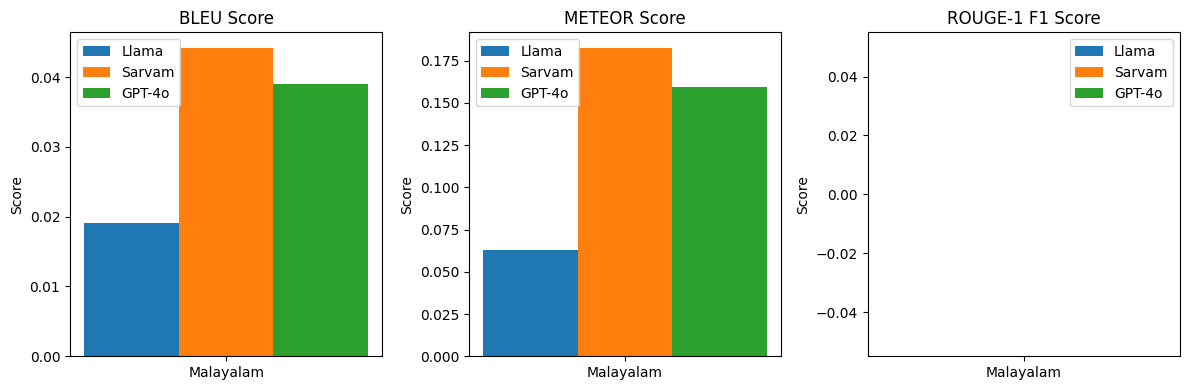

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for plotting
models = ['Llama', 'Sarvam', 'GPT-4o']
languages = ['Malayalam']

# Only Malayalam scores
bleu_scores = [
    [llama_bleu_scores['Malayalam']],
    [sarvam_bleu_scores['Malayalam']],
    [gpt4o_bleu_scores['Malayalam']]
]

meteor_scores = [
    [llama_meteor_scores['Malayalam']],
    [sarvam_meteor_scores['Malayalam']],
    [gpt4o_meteor_scores['Malayalam']]
]

rouge1_scores = [
    [llama_rouge_scores['Malayalam']['ROUGE-1']],
    [sarvam_rouge_scores['Malayalam']['ROUGE-1']],
    [gpt4o_rouge_scores['Malayalam']['ROUGE-1']]
]

x = np.arange(len(languages))
width = 0.22

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

# BLEU
for i, model in enumerate(models):
    axs[0].bar(x + i*width, bleu_scores[i], width, label=model)
axs[0].set_title('BLEU Score')
axs[0].set_xticks(x + width)
axs[0].set_xticklabels(languages)
axs[0].legend()
axs[0].set_ylabel('Score')

# METEOR
for i, model in enumerate(models):
    axs[1].bar(x + i*width, meteor_scores[i], width, label=model)
axs[1].set_title('METEOR Score')
axs[1].set_xticks(x + width)
axs[1].set_xticklabels(languages)
axs[1].legend()
axs[1].set_ylabel('Score')

# ROUGE-1 F1
for i, model in enumerate(models):
    axs[2].bar(x + i*width, rouge1_scores[i], width, label=model)
axs[2].set_title('ROUGE-1 F1 Score')
axs[2].set_xticks(x + width)
axs[2].set_xticklabels(languages)
axs[2].legend()
axs[2].set_ylabel('Score')

plt.tight_layout()
plt.show()


In [63]:
import pandas as pd

# Prepare data for the table (Malayalam only)
data = {
    "Language": ["Malayalam"],
    "Sarvam BLEU": [sarvam_bleu_scores['Malayalam']],
    "Llama BLEU": [llama_bleu_scores['Malayalam']],
    "GPT-4o BLEU": [gpt4o_bleu_scores['Malayalam']],
    "Sarvam METEOR": [sarvam_meteor_scores['Malayalam']],
    "Llama METEOR": [llama_meteor_scores['Malayalam']],
    "GPT-4o METEOR": [gpt4o_meteor_scores['Malayalam']],
    "Sarvam ROUGE-1": [sarvam_rouge_scores['Malayalam']['ROUGE-1']],
    "Llama ROUGE-1": [llama_rouge_scores['Malayalam']['ROUGE-1']],
    "GPT-4o ROUGE-1": [gpt4o_rouge_scores['Malayalam']['ROUGE-1']]
}

df = pd.DataFrame(data)
# Format float columns for neatness
float_cols = df.columns.drop("Language")
df[float_cols] = df[float_cols].applymap(lambda x: f"{x:.4f}")
print(df.to_string(index=False))

 Language Sarvam BLEU Llama BLEU GPT-4o BLEU Sarvam METEOR Llama METEOR GPT-4o METEOR Sarvam ROUGE-1 Llama ROUGE-1 GPT-4o ROUGE-1
Malayalam      0.0442     0.0192      0.0391        0.1827       0.0630        0.1597         0.0000        0.0000         0.0000


/var/folders/8w/vvk6gdlj70zgwp6z82ndv3lh0000gn/T/ipykernel_24033/2660633029.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[float_cols] = df[float_cols].applymap(lambda x: f"{x:.4f}")
